In [3]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

x1, y1, x2, y2, x3, y3, x4, y4 = sp.symbols('x1 y1 x2 y2 x3 y3 x4 y4')


t, t2, t3, t4 = sp.symbols('t t2 t3 t4')

t2 = t * t
t3 = t2 * t


p1 = [x1, y1]
p2 = [x2, y2]
p3 = [x3, y3]
p4 = [x4, y4]

# 3 by 3 matrix

M = sp.Matrix([[1, 0, 0],
               [-2, 2, 0],
               [1, -2, 1]])
P = sp.Matrix([p1, p2, p3])

T = sp.Matrix([1, t, t2])
# Cubic Bezier curve
print('M = ')
res = T.T*M*P
sp.pprint(res[0])


M = 
 2         ⎛ 2          ⎞      ⎛     2      ⎞
t ⋅x₃ + x₁⋅⎝t  - 2⋅t + 1⎠ + x₂⋅⎝- 2⋅t  + 2⋅t⎠


In [2]:
import x3
from math import *

def my_callback(cmd, what, arg, more):
    print(cmd, what, arg)

class bez:
    def __init__(self):
        self.coords = [(10, 10), (200, 10), (300, 200), (400, 100)]
        self.hit = None
    def draw(self, dc):
        coords = self.coords
        dc.setrgba(0, 0, 0.5, 1)
        dc.moveto(coords[0][0], coords[0][1])
        dc.curveto(coords[1][0], coords[1][1], coords[2][0], coords[2][1],
                   coords[3][0], coords[3][1])
        dc.stroke()
        dc.setrgba(0, 0.5, 0, 0.5)
        dc.moveto(coords[0][0], coords[0][1])
        dc.lineto(coords[1][0], coords[1][1])
        dc.stroke()
        dc.moveto(coords[2][0], coords[2][1])
        dc.lineto(coords[3][0], coords[3][1])
        dc.stroke()
        dc.setrgba(1, 0, 0, .5)
        for x, y in coords:
            dc.rectangle(x - 3, y - 3, 6, 6)
            dc.fill()
    def mouse(self, button, mods, x, y):
        if button == 1:
            for i in range(4):
                if hypot(x - self.coords[i][0], y - self.coords[i][1]) < 4:
                    self.hit = i
        elif button == -1:
            self.hit = None
        elif self.hit != None:
            self.coords[self.hit] = (x, y)
            self.view.dirty()

win = x3.window(0, "beztest", my_callback)

x3.view(win, 259, bez())

x3.main()


ModuleNotFoundError: No module named 'x3'

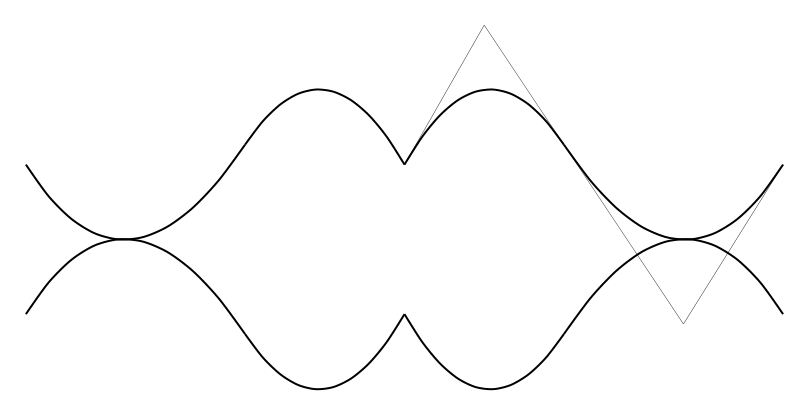

In [45]:
import numpy as np

import simetri.graphics as sg

t = .1
t2 = t * t
t3 = t2 * t

x1, y1 = 10, 0
x2, y2 = 50, 70
x3, y3 = 90, 10
x4, y4 = 150, -80
x5, y5 = 200, 0

p1 = [x1, y1]
p2 = [x2, y2]
p3 = [x3, y3]
p4 = [x4, y4]
p5 = [x5, y5]

# 3 by 3 matrix

M = np.array([[1, 0, 0],
               [-2, 2, 0],
               [1, -2, 1]])
P = np.array([p1, p2, p3])

n=10
f = np.ones(n)
t = np.linspace(0, 1, n)
t2 = t * t
# print(f.shape, t.shape, t2.shape)
# combine the f, t, t2 as column stack
T = np.column_stack((f, t, t2))
# print(T.shape)
# T = np.array([[1, t, t2], [1, t3, t4]])
# # Cubic Bezier curve
# print(T.shape, M.shape, P.shape)
# print(T)
TM = T @ M
res = TM @ P
# print(res)

P2 = np.array([p3, p4, p5])
res2 = TM @ P2


curve = sg.Shape([tuple(p) for p in res])
curve2 = sg.Shape([tuple(p) for p in res2])

canvas = sg.Canvas()
curves = sg.Batch([curve, curve2])
# canvas.draw(curve.scale(3), line_width=2, smooth=True)
# canvas.draw(curve2.scale(3), line_width=2, smooth=True)
curves.scale(2).mirror(curves.bottom, reps=1).mirror(curves.left, reps=1)
canvas.draw(curves, line_width=2, smooth=True)
canvas.draw(sg.Shape([p1, p2]).scale(2))
canvas.draw(sg.Shape([p2, p3]).scale(2))
canvas.draw(sg.Shape([p4, p3]).scale(2))
canvas.draw(sg.Shape([p4, p5]).scale(2))
# canvas.line(p1, p2, scale=3)
# canvas.line(p2, p3, scale=3)
canvas.display()

In [43]:
import timeit


def bezier_points(p0, p1, p2, p3, n_points):
    """Return the points on a cubic Bezier curve."""
    t = np.linspace(0, 1, n_points)
    x = (1 - t)**3 * p0[0] + 3 * (1 - t)**2 * t * p1[0] + 3 * (1 - t) * t**2 * p2[0] + t**3 * p3[0]
    y = (1 - t)**3 * p0[1] + 3 * (1 - t)**2 * t * p1[1] + 3 * (1 - t) * t**2 * p2[1] + t**3 * p3[1]

    return np.column_stack((x, y))

    # if TM is precomputed this is much faster
    # As is it is 50% faster than the above
    # n=100
    # f = np.ones(n)
    # t = np.linspace(0, 1, n)
    # t2 = t * t
    # t3 = t2 * t
    # T = np.column_stack((f, t, t2, t3))
    # M = np.array([[1, 0, 0, 0],
    #             [-3, 3, 0, 0],
    #             [3, -6, 3, 0],
    #            [-1, 3, -3, 1]])
    # TM = T @ M
    # return TM @ P


def q_bezier_points(p0, p1, p2, n_points):
    """Return the points on a quadratic Bezier curve."""
    t = np.linspace(0, 1, n_points)
    x = (1 - t)**2 * p0[0] + 2 * (1 - t) * t * p1[0] + t**2 * p2[0]
    y = (1 - t)**2 * p0[1] + 2 * (1 - t) * t * p1[1] + t**2 * p2[1]

    return np.column_stack((x, y))

    # if TM is precomputed this is much faster
    # As is it is 50% faster than the above
    # n=100
    # f = np.ones(n)
    # t = np.linspace(0, 1, n)
    # t2 = t * t
    # T = np.column_stack((f, t, t2))
    # M = np.array([[1, 0, 0],
    #             [-2, 2, 0],
    #             [1, -2, 1]])
    # TM = T @ M
    # return TM @ P


p1 = [x1, y1]
p2 = [x2, y2]
p3 = [x3, y3]
p4 = [x4, y4]

def func():
    q_bezier_points(p1, p2, p3, 100)


M = np.array([[1, 0, 0],
                [-2, 2, 0],
                [1, -2, 1]])
def func2():
    n=100
    f = np.ones(n)
    t = np.linspace(0, 1, n)
    t2 = t * t
    T = np.column_stack((f, t, t2))
    TM = T @ M
    return TM @ P

time_taken = timeit.timeit(stmt=func, number=1000)
print("Time taken:", time_taken)
time_taken = timeit.timeit(stmt=func2, number=1000)
print("Time taken:", time_taken)

Time taken: 0.01870990003226325
Time taken: 0.012134499964304268


In [7]:
# https://stackoverflow.com/questions/734076/how-to-best-approximate-a-geometrical-arc-with-a-bezier-curve
# Probably from APPROXIMATION OF A CUBIC BEZIER CURVE BY CIRCULAR  ARCS AND VICE VERSA by Aleksas Riškus
# This is an 8-year-old question, but one that I recently struggled with, so
# I thought I'd share what I came up with. I spent a lot of time trying to use solution (9)
# from this article by Aleksas Riškus and couldn't get any sensible numbers out of it until
# I did some Googling and learned that, apparently, there were some typos in the equations.
# Per the corrections listed in this blog post, given the start and end points of the
# arc ([x1, y1] and [x4, y4], respectively) and the the center of the circle ([xc, yc]),
# one can derive the control points for a cubic Bézier curve ([x2, y2] and [x3, y3]) as follows:
from math import sqrt

xc = 0
yc = 0.1

x1 = 35.35
y1 = 35.35

x4 = 50.01
y4 = 0

ax = x1 - xc
ay = y1 - yc
bx = x4 - xc
by = y4 - yc
q1 = ax * ax + ay * ay
q2 = q1 + ax * bx + ay * by
k2 = (4/3) * (sqrt(2 * q1 * q2) - q2) / (ax * by - ay * bx)

x2 = xc + ax - k2 * ay
y2 = yc + ay + k2 * ax
x3 = xc + bx + k2 * by
y3 = yc + by - k2 * bx

print(x2, y2, x3, y3)


44.65144619332743 26.022166725273067 50.03638708139951 13.196179407895164


In [29]:
import pprint

import numpy as np
array = np.array

def bezier_points(p0, p1, p2, p3, n_points):
    """Return the points on a cubic Bezier curve.
    t = np.linspace(0, 1, n_points)
    x = (1 - t)**3 * p0[0] + 3 * (1 - t)**2 * t * p1[0] + 3 * (1 - t) * t**2 * p2[0] + t**3 * p3[0]
    y = (1 - t)**3 * p0[1] + 3 * (1 - t)**2 * t * p1[1] + 3 * (1 - t) * t**2 * p2[1] + t**3 * p3[1]
    """

    n = n_points
    f = np.ones(n)
    t = np.linspace(0, 1, n)
    t2 = t * t
    t3 = t2 * t
    T = np.column_stack((f, t, t2, t3))
    M = array([[1, 0, 0, 0],
                [-3, 3, 0, 0],
                [3, -6, 3, 0],
               [-1, 3, -3, 1]])
    TM = T @ M
    # to do: Precompute TM for multiple values and memoize it for new n
    P = array([p0, p1, p2, p3])
    return TM @ P


def get_TM(n_points):
    M = array([[1, 0, 0, 0],
                    [-3, 3, 0, 0],
                    [3, -6, 3, 0],
                [-1, 3, -3, 1]])
    t = np.linspace(0, 1, n_points)
    f = np.ones(n_points)
    t2 = t * t
    t3 = t2 * t
    T = np.column_stack((f, t, t2, t3))
    TM = T @ M
    return np.round(TM, decimals=3)

def get_TMQ(n_points):
    n = n_points
    f = np.ones(n)
    t = np.linspace(0, 1, n)
    t2 = t * t
    T = np.column_stack((f, t, t2))
    M = array([[1, 0, 0],
                [-2, 2, 0],
                [1, -2, 1]])
    TMQ = T @ M

    return np.round(TMQ, decimals=3)

for i in range(1, 21):
    TM = get_TMQ(i*5)
    print(f'{i*5}:')
    pprint.pprint(TM.tolist())
    print(',\n')


5:
[[1.0, 0.0, 0.0],
 [0.562, 0.375, 0.062],
 [0.25, 0.5, 0.25],
 [0.062, 0.375, 0.562],
 [0.0, 0.0, 1.0]]
,

10:
[[1.0, 0.0, 0.0],
 [0.79, 0.198, 0.012],
 [0.605, 0.346, 0.049],
 [0.444, 0.444, 0.111],
 [0.309, 0.494, 0.198],
 [0.198, 0.494, 0.309],
 [0.111, 0.444, 0.444],
 [0.049, 0.346, 0.605],
 [0.012, 0.198, 0.79],
 [0.0, 0.0, 1.0]]
,

15:
[[1.0, 0.0, 0.0],
 [0.862, 0.133, 0.005],
 [0.735, 0.245, 0.02],
 [0.617, 0.337, 0.046],
 [0.51, 0.408, 0.082],
 [0.413, 0.459, 0.128],
 [0.327, 0.49, 0.184],
 [0.25, 0.5, 0.25],
 [0.184, 0.49, 0.327],
 [0.128, 0.459, 0.413],
 [0.082, 0.408, 0.51],
 [0.046, 0.337, 0.617],
 [0.02, 0.245, 0.735],
 [0.005, 0.133, 0.862],
 [0.0, 0.0, 1.0]]
,

20:
[[1.0, 0.0, 0.0],
 [0.898, 0.1, 0.003],
 [0.801, 0.188, 0.011],
 [0.709, 0.266, 0.025],
 [0.623, 0.332, 0.044],
 [0.543, 0.388, 0.069],
 [0.468, 0.432, 0.1],
 [0.399, 0.465, 0.136],
 [0.335, 0.488, 0.177],
 [0.277, 0.499, 0.224],
 [0.224, 0.499, 0.277],
 [0.177, 0.488, 0.335],
 [0.136, 0.465, 0.399],
 [0.1,